# Problem Statement

### Health Insurance Lead Prediction

Our Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the client needs our help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

Demographics (city, age, region etc.)

Information regarding holding policies of the customer

Recommended Policy Information

### Data Dictionary

#### Train Data

ID : Unique Identifier for a row

City_Code: Code for the City of the customers

Region_Code: Code for the Region of the customers

Accomodation_Type: Customer Owns or Rents the house

Reco_Insurance_Type: Joint or Individual type for the recommended insurance

Upper_Age: Maximum age of the customer 

Lower _Age:	Minimum age of the customer

Is_Spouse:	If the customers are married to each other(in case of joint insurance) 

Health_Indicator:Encoded values for health of the customer

Holding_Policy_Duration	Duration: (in years) of holding policy (a policy that customer has already subscribed to with the company)

Holding_Policy_Type:Type of holding policy

Reco_Policy_Cat:Encoded value for recommended health insurance

Reco_Policy_Premium	Annual Premium: (INR) for the recommended health insurance

Response: (Target)	0 : Customer did not show interest in the recommended policy,1 : Customer showed interest in the recommended policy


#### Evaluation :
The evaluation metric is roc_auc_score across all entries in the test set

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Loading the train and test data as dataframe
df1=pd.read_csv('train_Df64byy.csv')
df2=pd.read_csv('test_YCcRUnU.csv')

In [3]:
#making copy of data to avoid any change in original dataframe
df_train=df1.copy()
df_test=df2.copy()

## EDA

In [4]:
#Shape of the data
print('Train data shape is: ',df_train.shape)
print('Test data shape is: ',df_test.shape)

Train data shape is:  (50882, 14)
Test data shape is:  (21805, 13)


In [5]:
#Displaying some rows of train data
df_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [6]:
#Column in train data
df_train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [7]:
#Checking data types of attributes 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

From the above we can see that we have categorical as well as numerical features,also we have some missing values.There are some attributes which have data type float/int but they are actually in sense categorical.

In [8]:
#Missing value check in Train set
df_train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [9]:
df_test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

From the above we can see that we have missing values present in both train and test data in the same features.So proper handling of missing value is to be done

### Univariate and Bi-variate analysis

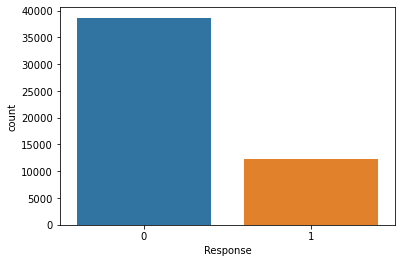

In [10]:
#Checking our target column distribution
sns.countplot(df_train['Response'])
#Clearly we have more customer which do not show interest in recommended policy.The dataset look like imbalance

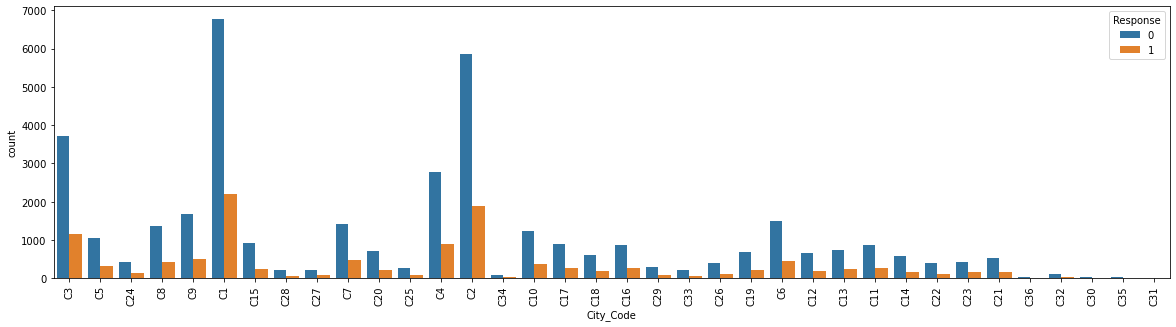

In [11]:
# Distribution of City_code
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(df_train['City_Code'],hue=df_train['Response'])

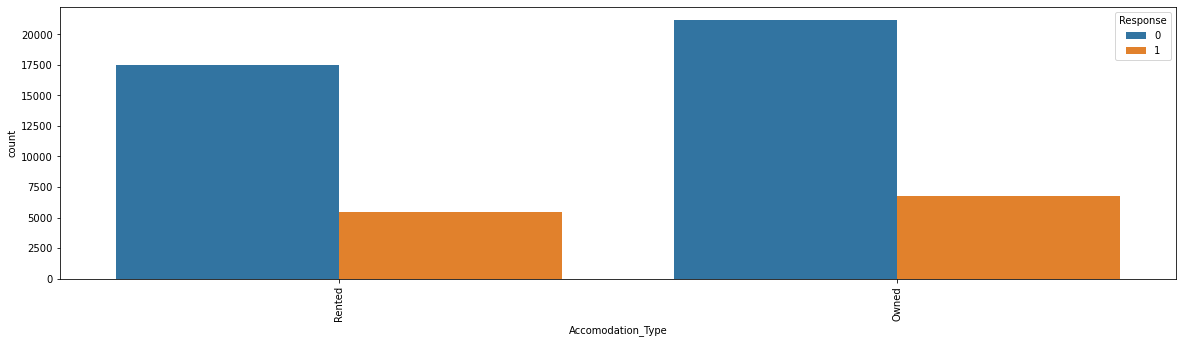

In [12]:
# Distribution of Accomodation_Type
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Accomodation_Type'],hue=df_train['Response'])

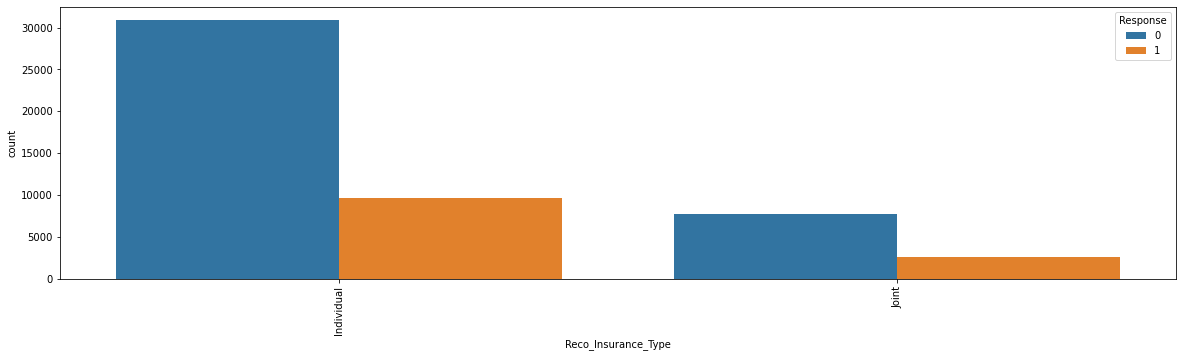

In [13]:
# Distribution of Reco_Insurance_Type
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Reco_Insurance_Type'],hue=df_train['Response'])

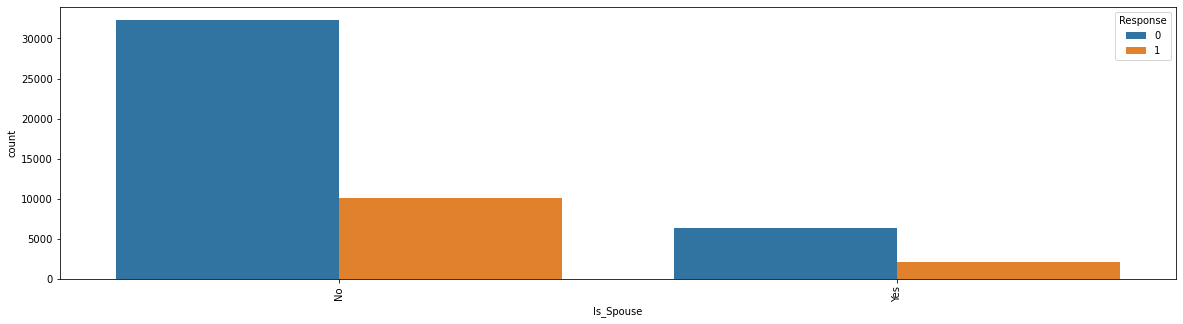

In [14]:
# Distribution of Is_Spouse
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Is_Spouse'],hue=df_train['Response'])

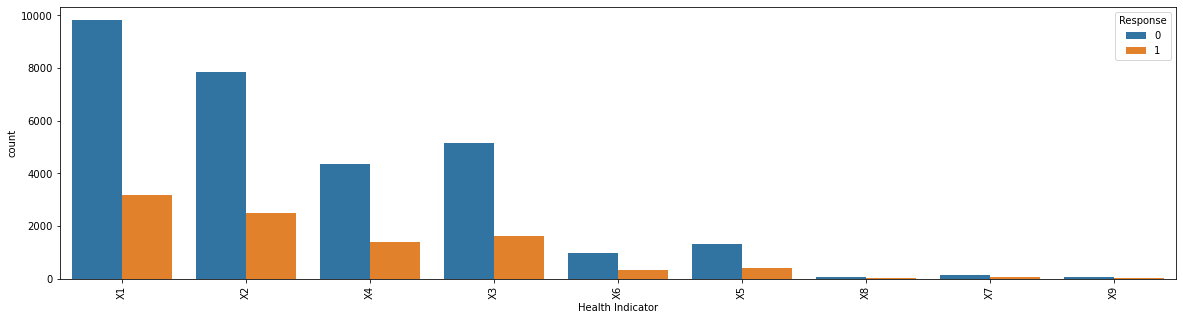

In [15]:
# Distribution of Health Indicator
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Health Indicator'],hue=df_train['Response'])

In [16]:
#Lets check numerical column 
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [17]:
#For categorical
df_train.describe(include = 'object').T

,count,unique,top,freq
City_Code,50882,36,C1,8973
Accomodation_Type,50882,2,Owned,27951
Reco_Insurance_Type,50882,2,Individual,40536
Is_Spouse,50882,2,No,42460
Health Indicator,39191,9,X1,13010
Holding_Policy_Duration,30631,15,1.0,4499


In [18]:
df_train.corr()['Response']
#corelation is very low with target feature for numerical values features

ID                     0.005159
Region_Code            0.001121
Upper_Age              0.002772
Lower_Age             -0.002099
Holding_Policy_Type    0.009297
Reco_Policy_Cat        0.114321
Reco_Policy_Premium    0.007943
Response               1.000000
Name: Response, dtype: float64

## Feature Engineering

#### 1)New features

In [19]:
missing_cols=[col for col in df_train.columns if df_train[col].isnull().any()]
missing_cols

['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type']

In [20]:
#Function which will create new feature corresponding to features which have missing value.It will help model to learn missing place
def create_missing_new_var(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull().isnull(),1,0)
    

In [21]:
for feature in missing_cols :
    create_missing_new_var(df_train,feature)
    create_missing_new_var(df_test,feature)

In [22]:
df_test.head(2)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Health Indicator_newvar,Holding_Policy_Duration_newvar,Holding_Policy_Type_newvar
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0,0,0,0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,0,0,0


####  2)Missing value imputation

In [23]:
#Function which will impute missing value with value 'Missing'
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Missing",df[variable])
    
for feature in missing_cols :
    impute_nan(df_train,feature)
    impute_nan(df_test,feature)

reduced_X_train=df_train
reduced_X_test=df_test
reduced_X_train.shape

(50882, 17)

In [24]:
df_test.head(2)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Health Indicator_newvar,Holding_Policy_Duration_newvar,Holding_Policy_Type_newvar
0,50883,C1,156,Owned,Individual,30,30,No,Missing,6.0,3.0,5,11934.0,0,0,0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8,0,0,0


In [25]:
#Fucntion which will concat train and test data
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

#Function which will split the data into train and test

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:50881], all_data.loc[50882:].drop(['Response'], axis=1)

In [27]:
#This is done so that we can perform some operation at once on both train and test
df_all_reduced=concat_df(reduced_X_train,reduced_X_test)
df_all_reduced.head()

,Accomodation_Type,City_Code,Health Indicator,Health Indicator_newvar,Holding_Policy_Duration,Holding_Policy_Duration_newvar,Holding_Policy_Type,Holding_Policy_Type_newvar,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
0,Rented,C3,X1,0,14+,0,3.0,0,1,No,36,Individual,22,11628.0,3213,0.0,36
1,Owned,C5,X2,0,Missing,0,Missing,0,2,No,22,Joint,22,30510.0,1117,0.0,75
2,Owned,C5,Missing,0,1.0,0,1.0,0,3,No,32,Individual,19,7450.0,3732,1.0,32
3,Owned,C24,X1,0,14+,0,3.0,0,4,No,48,Joint,19,17780.0,4378,0.0,52
4,Rented,C8,X2,0,3.0,0,1.0,0,5,No,44,Individual,16,10404.0,2190,0.0,44


In [28]:
#dropping features
#df_all_reduced=df_all_reduced.drop(['Health Indicator','Holding_Policy_Duration','Holding_Policy_Type'],axis=1)

In [29]:
#Handling categorical value
#cat_columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Reco_Policy_Cat','Response']
cat_columns=['City_Code','Region_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Reco_Policy_Cat','Health Indicator','Holding_Policy_Type','Holding_Policy_Duration']
#cat_columns=['City_Code','Region_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Reco_Policy_Cat']
for col in cat_columns:
    df_all_reduced[col]=pd.Categorical(df_all_reduced[col])
df_all_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72687 entries, 0 to 72686
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Accomodation_Type               72687 non-null  category
 1   City_Code                       72687 non-null  category
 2   Health Indicator                72687 non-null  category
 3   Health Indicator_newvar         72687 non-null  int32   
 4   Holding_Policy_Duration         72687 non-null  category
 5   Holding_Policy_Duration_newvar  72687 non-null  int32   
 6   Holding_Policy_Type             72687 non-null  category
 7   Holding_Policy_Type_newvar      72687 non-null  int32   
 8   ID                              72687 non-null  int64   
 9   Is_Spouse                       72687 non-null  category
 10  Lower_Age                       72687 non-null  int64   
 11  Reco_Insurance_Type             72687 non-null  category
 12  Reco_Policy_Cat   

In [30]:
df_all_reduced.shape

(72687, 17)

In [31]:
df_red_ohe=df_all_reduced  #as catboost will take care of categorical features
#df_red_ohe=pd.get_dummies(df_all_reduced)
#df_red_ohe.head()

In [32]:
# splitting into train and test
train_df,X_test=divide_df(df_red_ohe)
X_test.head(2)

,Accomodation_Type,City_Code,Health Indicator,Health Indicator_newvar,Holding_Policy_Duration,Holding_Policy_Duration_newvar,Holding_Policy_Type,Holding_Policy_Type_newvar,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Upper_Age
50882,Owned,C1,Missing,0,6.0,0,3.0,0,50883,No,30,Individual,5,11934.0,156,30
50883,Owned,C4,X1,0,3.0,0,3.0,0,50884,Yes,68,Joint,18,32204.8,7,69


In [33]:
train_df.head(2)

,Accomodation_Type,City_Code,Health Indicator,Health Indicator_newvar,Holding_Policy_Duration,Holding_Policy_Duration_newvar,Holding_Policy_Type,Holding_Policy_Type_newvar,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
0,Rented,C3,X1,0,14+,0,3.0,0,1,No,36,Individual,22,11628.0,3213,0.0,36
1,Owned,C5,X2,0,Missing,0,Missing,0,2,No,22,Joint,22,30510.0,1117,0.0,75


In [34]:
X=train_df.drop('Response',axis=1)
y=train_df['Response']

In [35]:
#splitting the train dataset so that some part of train data we got we can use in evaluation
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42,stratify=train_df['Response'])
print('X_train shape is : {} and y_train shape is {}'.format(X_train.shape,y_train.shape))
print('X_valid shape is : {} and y_valid shape is {}'.format(X_valid.shape,y_valid.shape))

X_train shape is : (40705, 16) and y_train shape is (40705,)
X_valid shape is : (10177, 16) and y_valid shape is (10177,)


### Model Creation & Evaluation

In [38]:
from catboost import CatBoostClassifier

In [39]:
#ftting the model
categorical_features_indices = np.where(X_train.dtypes != np.float)[0]

model_catb=CatBoostClassifier(random_state=42,cat_features=categorical_features_indices)
model_catb.fit(X_train,y_train)

Learning rate set to 0.050148
0:	learn: 0.6741341	total: 190ms	remaining: 3m 9s
1:	learn: 0.6586002	total: 274ms	remaining: 2m 16s
2:	learn: 0.6436535	total: 391ms	remaining: 2m 9s
3:	learn: 0.6292701	total: 506ms	remaining: 2m 6s
4:	learn: 0.6179165	total: 664ms	remaining: 2m 12s
5:	learn: 0.6079483	total: 747ms	remaining: 2m 3s
6:	learn: 0.5990404	total: 936ms	remaining: 2m 12s
7:	learn: 0.5905633	total: 1.05s	remaining: 2m 10s
8:	learn: 0.5780143	total: 1.22s	remaining: 2m 14s
9:	learn: 0.5657449	total: 1.33s	remaining: 2m 12s
10:	learn: 0.5607113	total: 1.47s	remaining: 2m 11s
11:	learn: 0.5509045	total: 1.6s	remaining: 2m 11s
12:	learn: 0.5475789	total: 1.63s	remaining: 2m 3s
13:	learn: 0.5445942	total: 1.66s	remaining: 1m 56s
14:	learn: 0.5366055	total: 1.82s	remaining: 1m 59s
15:	learn: 0.5342881	total: 1.89s	remaining: 1m 55s
16:	learn: 0.5278831	total: 2s	remaining: 1m 55s
17:	learn: 0.5217834	total: 2.11s	remaining: 1m 55s
18:	learn: 0.5169709	total: 2.25s	remaining: 1m 56s
1

160:	learn: 0.4452315	total: 25.5s	remaining: 2m 13s
161:	learn: 0.4451670	total: 25.7s	remaining: 2m 12s
162:	learn: 0.4450989	total: 25.9s	remaining: 2m 12s
163:	learn: 0.4449798	total: 26.1s	remaining: 2m 12s
164:	learn: 0.4448740	total: 26.3s	remaining: 2m 13s
165:	learn: 0.4448740	total: 26.4s	remaining: 2m 12s
166:	learn: 0.4448034	total: 26.5s	remaining: 2m 12s
167:	learn: 0.4447236	total: 26.7s	remaining: 2m 12s
168:	learn: 0.4446789	total: 26.9s	remaining: 2m 12s
169:	learn: 0.4445841	total: 27.1s	remaining: 2m 12s
170:	learn: 0.4445430	total: 27.3s	remaining: 2m 12s
171:	learn: 0.4443482	total: 27.5s	remaining: 2m 12s
172:	learn: 0.4443234	total: 27.7s	remaining: 2m 12s
173:	learn: 0.4443017	total: 27.9s	remaining: 2m 12s
174:	learn: 0.4442371	total: 28.1s	remaining: 2m 12s
175:	learn: 0.4441818	total: 28.3s	remaining: 2m 12s
176:	learn: 0.4441316	total: 28.5s	remaining: 2m 12s
177:	learn: 0.4440899	total: 28.7s	remaining: 2m 12s
178:	learn: 0.4440568	total: 28.8s	remaining: 

319:	learn: 0.4357482	total: 55.1s	remaining: 1m 56s
320:	learn: 0.4356651	total: 55.2s	remaining: 1m 56s
321:	learn: 0.4355939	total: 55.4s	remaining: 1m 56s
322:	learn: 0.4355293	total: 55.6s	remaining: 1m 56s
323:	learn: 0.4355013	total: 55.7s	remaining: 1m 56s
324:	learn: 0.4354818	total: 55.9s	remaining: 1m 56s
325:	learn: 0.4354518	total: 56.1s	remaining: 1m 56s
326:	learn: 0.4354077	total: 56.3s	remaining: 1m 55s
327:	learn: 0.4353689	total: 56.5s	remaining: 1m 55s
328:	learn: 0.4353077	total: 56.6s	remaining: 1m 55s
329:	learn: 0.4352692	total: 56.8s	remaining: 1m 55s
330:	learn: 0.4352053	total: 57s	remaining: 1m 55s
331:	learn: 0.4351568	total: 57.1s	remaining: 1m 54s
332:	learn: 0.4350760	total: 57.4s	remaining: 1m 54s
333:	learn: 0.4350593	total: 57.5s	remaining: 1m 54s
334:	learn: 0.4349882	total: 57.7s	remaining: 1m 54s
335:	learn: 0.4349351	total: 57.9s	remaining: 1m 54s
336:	learn: 0.4349089	total: 58.1s	remaining: 1m 54s
337:	learn: 0.4348903	total: 58.3s	remaining: 1m

473:	learn: 0.4285559	total: 1m 22s	remaining: 1m 31s
474:	learn: 0.4285270	total: 1m 23s	remaining: 1m 31s
475:	learn: 0.4284717	total: 1m 23s	remaining: 1m 31s
476:	learn: 0.4283995	total: 1m 23s	remaining: 1m 31s
477:	learn: 0.4283537	total: 1m 23s	remaining: 1m 31s
478:	learn: 0.4283020	total: 1m 23s	remaining: 1m 31s
479:	learn: 0.4282944	total: 1m 23s	remaining: 1m 30s
480:	learn: 0.4282624	total: 1m 24s	remaining: 1m 30s
481:	learn: 0.4282194	total: 1m 24s	remaining: 1m 30s
482:	learn: 0.4281856	total: 1m 24s	remaining: 1m 30s
483:	learn: 0.4281559	total: 1m 24s	remaining: 1m 30s
484:	learn: 0.4281167	total: 1m 24s	remaining: 1m 30s
485:	learn: 0.4280778	total: 1m 24s	remaining: 1m 29s
486:	learn: 0.4280443	total: 1m 25s	remaining: 1m 29s
487:	learn: 0.4280116	total: 1m 25s	remaining: 1m 29s
488:	learn: 0.4279861	total: 1m 25s	remaining: 1m 29s
489:	learn: 0.4279321	total: 1m 25s	remaining: 1m 29s
490:	learn: 0.4279270	total: 1m 25s	remaining: 1m 28s
491:	learn: 0.4278925	total:

626:	learn: 0.4222719	total: 1m 50s	remaining: 1m 5s
627:	learn: 0.4222290	total: 1m 50s	remaining: 1m 5s
628:	learn: 0.4222008	total: 1m 50s	remaining: 1m 5s
629:	learn: 0.4221818	total: 1m 50s	remaining: 1m 5s
630:	learn: 0.4221093	total: 1m 51s	remaining: 1m 4s
631:	learn: 0.4220974	total: 1m 51s	remaining: 1m 4s
632:	learn: 0.4220384	total: 1m 51s	remaining: 1m 4s
633:	learn: 0.4219700	total: 1m 51s	remaining: 1m 4s
634:	learn: 0.4219429	total: 1m 51s	remaining: 1m 4s
635:	learn: 0.4219174	total: 1m 51s	remaining: 1m 4s
636:	learn: 0.4218611	total: 1m 52s	remaining: 1m 3s
637:	learn: 0.4218295	total: 1m 52s	remaining: 1m 3s
638:	learn: 0.4217885	total: 1m 52s	remaining: 1m 3s
639:	learn: 0.4217718	total: 1m 52s	remaining: 1m 3s
640:	learn: 0.4217494	total: 1m 52s	remaining: 1m 3s
641:	learn: 0.4216774	total: 1m 53s	remaining: 1m 3s
642:	learn: 0.4216485	total: 1m 53s	remaining: 1m 2s
643:	learn: 0.4215992	total: 1m 53s	remaining: 1m 2s
644:	learn: 0.4215461	total: 1m 53s	remaining:

783:	learn: 0.4161911	total: 2m 18s	remaining: 38.3s
784:	learn: 0.4161374	total: 2m 19s	remaining: 38.1s
785:	learn: 0.4161091	total: 2m 19s	remaining: 37.9s
786:	learn: 0.4160719	total: 2m 19s	remaining: 37.8s
787:	learn: 0.4160521	total: 2m 19s	remaining: 37.6s
788:	learn: 0.4159849	total: 2m 19s	remaining: 37.4s
789:	learn: 0.4159249	total: 2m 20s	remaining: 37.2s
790:	learn: 0.4159007	total: 2m 20s	remaining: 37.1s
791:	learn: 0.4158743	total: 2m 20s	remaining: 36.9s
792:	learn: 0.4158631	total: 2m 20s	remaining: 36.7s
793:	learn: 0.4158533	total: 2m 20s	remaining: 36.5s
794:	learn: 0.4158326	total: 2m 20s	remaining: 36.3s
795:	learn: 0.4157828	total: 2m 21s	remaining: 36.2s
796:	learn: 0.4156800	total: 2m 21s	remaining: 36s
797:	learn: 0.4156472	total: 2m 21s	remaining: 35.8s
798:	learn: 0.4156252	total: 2m 21s	remaining: 35.6s
799:	learn: 0.4155683	total: 2m 21s	remaining: 35.5s
800:	learn: 0.4155547	total: 2m 22s	remaining: 35.3s
801:	learn: 0.4155269	total: 2m 22s	remaining: 3

939:	learn: 0.4103316	total: 2m 46s	remaining: 10.7s
940:	learn: 0.4102909	total: 2m 47s	remaining: 10.5s
941:	learn: 0.4102367	total: 2m 47s	remaining: 10.3s
942:	learn: 0.4102240	total: 2m 47s	remaining: 10.1s
943:	learn: 0.4102071	total: 2m 47s	remaining: 9.95s
944:	learn: 0.4101490	total: 2m 48s	remaining: 9.78s
945:	learn: 0.4101118	total: 2m 48s	remaining: 9.61s
946:	learn: 0.4100864	total: 2m 48s	remaining: 9.43s
947:	learn: 0.4100618	total: 2m 48s	remaining: 9.25s
948:	learn: 0.4100282	total: 2m 48s	remaining: 9.08s
949:	learn: 0.4099825	total: 2m 49s	remaining: 8.9s
950:	learn: 0.4099357	total: 2m 49s	remaining: 8.72s
951:	learn: 0.4099136	total: 2m 49s	remaining: 8.54s
952:	learn: 0.4098828	total: 2m 49s	remaining: 8.37s
953:	learn: 0.4098544	total: 2m 49s	remaining: 8.19s
954:	learn: 0.4098206	total: 2m 50s	remaining: 8.01s
955:	learn: 0.4097944	total: 2m 50s	remaining: 7.83s
956:	learn: 0.4097359	total: 2m 50s	remaining: 7.66s
957:	learn: 0.4096937	total: 2m 50s	remaining: 

In [40]:
#Evaluation on validation set-This will predict the class
y_pred = model_catb.predict(X_valid)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
#Our metric is supposed to be roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model_catb.predict_proba(X_train)[:, 1])

0.8915804374182992

In [42]:
#score at validation set
roc_auc_score(y_valid, model_catb.predict_proba(X_valid)[:, 1])

0.807203183673772

In [43]:
#This predict the probability of Response class
model_catb.predict_proba(X_valid)[:, 1]

array([0.47290768, 0.03150647, 0.39832805, ..., 0.49466049, 0.23142397,
       0.13936119])

In [44]:
#model fitting on whole data 
model=CatBoostClassifier(random_state=42,cat_features=categorical_features_indices)
model.fit(X,y)

Learning rate set to 0.055162
0:	learn: 0.6725247	total: 240ms	remaining: 3m 59s
1:	learn: 0.6552868	total: 345ms	remaining: 2m 52s
2:	learn: 0.6388300	total: 409ms	remaining: 2m 15s
3:	learn: 0.6254672	total: 619ms	remaining: 2m 34s
4:	learn: 0.6133332	total: 759ms	remaining: 2m 31s
5:	learn: 0.6029297	total: 946ms	remaining: 2m 36s
6:	learn: 0.5863425	total: 1.09s	remaining: 2m 34s
7:	learn: 0.5720386	total: 1.22s	remaining: 2m 31s
8:	learn: 0.5591321	total: 1.43s	remaining: 2m 37s
9:	learn: 0.5483313	total: 1.65s	remaining: 2m 43s
10:	learn: 0.5392160	total: 1.83s	remaining: 2m 44s
11:	learn: 0.5309581	total: 1.99s	remaining: 2m 43s
12:	learn: 0.5280455	total: 2.02s	remaining: 2m 33s
13:	learn: 0.5209004	total: 2.25s	remaining: 2m 38s
14:	learn: 0.5179589	total: 2.48s	remaining: 2m 42s
15:	learn: 0.5108122	total: 2.79s	remaining: 2m 51s
16:	learn: 0.5091350	total: 2.82s	remaining: 2m 43s
17:	learn: 0.5029965	total: 3.04s	remaining: 2m 46s
18:	learn: 0.5017261	total: 3.09s	remaining:

158:	learn: 0.4395217	total: 29.1s	remaining: 2m 33s
159:	learn: 0.4393651	total: 29.3s	remaining: 2m 33s
160:	learn: 0.4392984	total: 29.5s	remaining: 2m 33s
161:	learn: 0.4392701	total: 29.7s	remaining: 2m 33s
162:	learn: 0.4392180	total: 29.9s	remaining: 2m 33s
163:	learn: 0.4391953	total: 30.2s	remaining: 2m 33s
164:	learn: 0.4391429	total: 30.4s	remaining: 2m 33s
165:	learn: 0.4391232	total: 30.7s	remaining: 2m 34s
166:	learn: 0.4390564	total: 30.9s	remaining: 2m 33s
167:	learn: 0.4390019	total: 31.1s	remaining: 2m 33s
168:	learn: 0.4389257	total: 31.3s	remaining: 2m 33s
169:	learn: 0.4388920	total: 31.6s	remaining: 2m 34s
170:	learn: 0.4388607	total: 31.8s	remaining: 2m 34s
171:	learn: 0.4387870	total: 32.1s	remaining: 2m 34s
172:	learn: 0.4386609	total: 32.3s	remaining: 2m 34s
173:	learn: 0.4386184	total: 32.5s	remaining: 2m 34s
174:	learn: 0.4385513	total: 32.8s	remaining: 2m 34s
175:	learn: 0.4384932	total: 33s	remaining: 2m 34s
176:	learn: 0.4384340	total: 33.2s	remaining: 2m

314:	learn: 0.4310456	total: 1m 2s	remaining: 2m 15s
315:	learn: 0.4310083	total: 1m 2s	remaining: 2m 15s
316:	learn: 0.4309635	total: 1m 2s	remaining: 2m 15s
317:	learn: 0.4308517	total: 1m 3s	remaining: 2m 15s
318:	learn: 0.4308317	total: 1m 3s	remaining: 2m 15s
319:	learn: 0.4308082	total: 1m 3s	remaining: 2m 14s
320:	learn: 0.4307602	total: 1m 3s	remaining: 2m 14s
321:	learn: 0.4307146	total: 1m 3s	remaining: 2m 14s
322:	learn: 0.4306435	total: 1m 4s	remaining: 2m 14s
323:	learn: 0.4306329	total: 1m 4s	remaining: 2m 14s
324:	learn: 0.4305544	total: 1m 4s	remaining: 2m 13s
325:	learn: 0.4305036	total: 1m 4s	remaining: 2m 13s
326:	learn: 0.4304582	total: 1m 4s	remaining: 2m 13s
327:	learn: 0.4303905	total: 1m 5s	remaining: 2m 13s
328:	learn: 0.4303454	total: 1m 5s	remaining: 2m 13s
329:	learn: 0.4303107	total: 1m 5s	remaining: 2m 13s
330:	learn: 0.4302855	total: 1m 5s	remaining: 2m 12s
331:	learn: 0.4302242	total: 1m 6s	remaining: 2m 12s
332:	learn: 0.4301712	total: 1m 6s	remaining: 

468:	learn: 0.4245958	total: 1m 35s	remaining: 1m 48s
469:	learn: 0.4245199	total: 1m 35s	remaining: 1m 47s
470:	learn: 0.4244616	total: 1m 35s	remaining: 1m 47s
471:	learn: 0.4244495	total: 1m 36s	remaining: 1m 47s
472:	learn: 0.4244290	total: 1m 36s	remaining: 1m 47s
473:	learn: 0.4243587	total: 1m 36s	remaining: 1m 47s
474:	learn: 0.4243174	total: 1m 36s	remaining: 1m 46s
475:	learn: 0.4242905	total: 1m 36s	remaining: 1m 46s
476:	learn: 0.4242546	total: 1m 37s	remaining: 1m 46s
477:	learn: 0.4242395	total: 1m 37s	remaining: 1m 46s
478:	learn: 0.4242132	total: 1m 37s	remaining: 1m 46s
479:	learn: 0.4241530	total: 1m 37s	remaining: 1m 45s
480:	learn: 0.4240994	total: 1m 37s	remaining: 1m 45s
481:	learn: 0.4240301	total: 1m 38s	remaining: 1m 45s
482:	learn: 0.4239748	total: 1m 38s	remaining: 1m 45s
483:	learn: 0.4239420	total: 1m 38s	remaining: 1m 45s
484:	learn: 0.4238675	total: 1m 38s	remaining: 1m 44s
485:	learn: 0.4238435	total: 1m 38s	remaining: 1m 44s
486:	learn: 0.4238078	total:

621:	learn: 0.4186364	total: 2m 8s	remaining: 1m 17s
622:	learn: 0.4185615	total: 2m 8s	remaining: 1m 17s
623:	learn: 0.4185131	total: 2m 8s	remaining: 1m 17s
624:	learn: 0.4184785	total: 2m 9s	remaining: 1m 17s
625:	learn: 0.4184502	total: 2m 9s	remaining: 1m 17s
626:	learn: 0.4184063	total: 2m 9s	remaining: 1m 17s
627:	learn: 0.4183598	total: 2m 9s	remaining: 1m 16s
628:	learn: 0.4183002	total: 2m 9s	remaining: 1m 16s
629:	learn: 0.4182611	total: 2m 10s	remaining: 1m 16s
630:	learn: 0.4182557	total: 2m 10s	remaining: 1m 16s
631:	learn: 0.4182252	total: 2m 10s	remaining: 1m 16s
632:	learn: 0.4181969	total: 2m 10s	remaining: 1m 15s
633:	learn: 0.4181538	total: 2m 11s	remaining: 1m 15s
634:	learn: 0.4181219	total: 2m 11s	remaining: 1m 15s
635:	learn: 0.4180920	total: 2m 11s	remaining: 1m 15s
636:	learn: 0.4180888	total: 2m 11s	remaining: 1m 15s
637:	learn: 0.4180461	total: 2m 12s	remaining: 1m 14s
638:	learn: 0.4180274	total: 2m 12s	remaining: 1m 14s
639:	learn: 0.4179717	total: 2m 12s	

776:	learn: 0.4130257	total: 2m 45s	remaining: 47.4s
777:	learn: 0.4130084	total: 2m 45s	remaining: 47.2s
778:	learn: 0.4129560	total: 2m 45s	remaining: 46.9s
779:	learn: 0.4129169	total: 2m 45s	remaining: 46.7s
780:	learn: 0.4128853	total: 2m 45s	remaining: 46.5s
781:	learn: 0.4128594	total: 2m 46s	remaining: 46.3s
782:	learn: 0.4128191	total: 2m 46s	remaining: 46.1s
783:	learn: 0.4127887	total: 2m 46s	remaining: 45.9s
784:	learn: 0.4127680	total: 2m 46s	remaining: 45.7s
785:	learn: 0.4127271	total: 2m 47s	remaining: 45.5s
786:	learn: 0.4127170	total: 2m 47s	remaining: 45.3s
787:	learn: 0.4126255	total: 2m 47s	remaining: 45.1s
788:	learn: 0.4125944	total: 2m 47s	remaining: 44.9s
789:	learn: 0.4125702	total: 2m 48s	remaining: 44.7s
790:	learn: 0.4125350	total: 2m 48s	remaining: 44.5s
791:	learn: 0.4125097	total: 2m 48s	remaining: 44.2s
792:	learn: 0.4124788	total: 2m 48s	remaining: 44s
793:	learn: 0.4124546	total: 2m 48s	remaining: 43.8s
794:	learn: 0.4124138	total: 2m 49s	remaining: 4

934:	learn: 0.4077629	total: 3m 22s	remaining: 14.1s
935:	learn: 0.4077501	total: 3m 23s	remaining: 13.9s
936:	learn: 0.4076939	total: 3m 23s	remaining: 13.7s
937:	learn: 0.4076511	total: 3m 23s	remaining: 13.5s
938:	learn: 0.4076285	total: 3m 23s	remaining: 13.2s
939:	learn: 0.4076106	total: 3m 24s	remaining: 13s
940:	learn: 0.4075836	total: 3m 24s	remaining: 12.8s
941:	learn: 0.4075409	total: 3m 24s	remaining: 12.6s
942:	learn: 0.4074991	total: 3m 24s	remaining: 12.4s
943:	learn: 0.4074771	total: 3m 24s	remaining: 12.2s
944:	learn: 0.4074473	total: 3m 25s	remaining: 11.9s
945:	learn: 0.4074267	total: 3m 25s	remaining: 11.7s
946:	learn: 0.4073918	total: 3m 25s	remaining: 11.5s
947:	learn: 0.4073634	total: 3m 25s	remaining: 11.3s
948:	learn: 0.4073445	total: 3m 25s	remaining: 11.1s
949:	learn: 0.4072974	total: 3m 26s	remaining: 10.8s
950:	learn: 0.4072879	total: 3m 26s	remaining: 10.6s
951:	learn: 0.4072750	total: 3m 26s	remaining: 10.4s
952:	learn: 0.4072330	total: 3m 26s	remaining: 1

In [45]:
#prdiction for test data
y_test_pred=model.predict_proba(X_test)[:,1]
y_test_pred

array([0.07681038, 0.11728043, 0.46980912, ..., 0.00812851, 0.55019222,
       0.0591018 ])

In [46]:
#Creating the data frame in the format of submission file format and saving the predicted result in csv format
submission_df=pd.DataFrame(columns=['ID','Response'])
submission_df['ID']=X_test['ID'].reset_index(drop=True)
submission_df['Response']=pd.Series(y_test_pred)
submission_df.to_csv('submission_5.csv', header=True,index=False)
submission_df.head(5)

,ID,Response
0,50883,0.076810
1,50884,0.117280
2,50885,0.469809
3,50886,0.093603
4,50887,0.052082
